# Navigator Module Tutorial

### Design Pattern of Library
There are three level of abstraction involved in the design of the library.
- **Application Modules**: The top level module that is used to interact with the library. For example, the parse module, at it's current level of development,  is used to parsed RINEX 3 observation files.
- **Functinal Classes**:  Each module contains a class that is used to perform the desired functionality. For example, the parse module contains the Parse class that user uses.
- **Interface to Functional Classes**:  Each functional class cannot be used without the use of an interface, indicated by "I" in prefix, class. These are plug and play classes that are used to modify the functionality of the functional class. For example, the parse module contains  IParseGPSNav that is used to parse GPS Navigation files. 


## Tutorial of Navigator Module

Here we will go through the basic functionality of the Navigator module. The Navigator module is used to perform the following tasks:
- Parse RINEX 3 Navigation Files
- Extract Satellite Ephemeris from the parsed Navigation Files
- Calculate Satellites Position from the extracted Ephemeris at user specified time
- Plot Satellites Trajetory on a 3D plot

### Tutorial of Parse Module

In [1]:
%load_ext autoreload
%autoreload 2
# How to import a module ?
from navigator.parse import Parser, IParseGPSNav

# User need to import Functional Class as well as the interface for it. For eg, Parser is a functional class and IParseGPSNav is the interface for it.

In [2]:
# Create an object of the fuunctional class
# Along with the object, pass the interface as a parameter to the functional class which will be used to call the methods of the functional class
parser = Parser(iparser=IParseGPSNav())

In [4]:
# How to work with the functional class ?
# Call it like a function. It's __call__ method will be called which is designed for it's main functionality.

# In this case, the filepath is passed as a parameter to the functional class
# User can see the return type and arguments of the __call__ method

metadata, data = parser(
    filepath="./data/JPLM00USA_R_20223230000_01D_GN.rnx.gz"
)  # This is how the functional class is called.
# This will parse the file and return the metadata and data of the file in Pandas DataFrame format

How does the data look?

In [5]:
# Here is the data returned by the functional class
data.head(5)
# THe data is in Pandas DataFrame format which is easy to work with. The Index are TOC and PRN

SVclockBias  SVclockDrift  SVclockDriftRate  IODE  \
time                sv                                                       
2022-11-18 23:59:44 G20     0.000469 -2.501110e-12               0.0  77.0   
2022-11-19 00:00:00 G03    -0.000373 -1.705303e-12               0.0  67.0   
                    G04    -0.000084  6.707523e-12               0.0  85.0   
                    G07     0.000286 -4.774847e-12               0.0  22.0   
                    G08    -0.000094 -1.818989e-12               0.0  16.0   

                              Crs        DeltaN        M0           Cuc  \
time                sv                                                    
2022-11-18 23:59:44 G20  20.56250  5.090569e-09 -0.683118  1.074746e-06   
2022-11-19 00:00:00 G03   8.84375  4.287321e-09 -2.840535  5.960464e-07   
                    G04 -60.31250  4.508402e-09  0.180804 -3.166497e-06   
                    G07  35.78125  4.544475e-09 -2.338986  1.551583e-06   
                    G08 -34.06250  4.694124e-09  0.547140 -1.728535e-06   

                         Eccentricity       Cus  ...  GPSWeek  L2Pflag  SVacc  \
time                sv                           ...                            
2022-11-18 23:59:44 G20      0.004739  0.000005  ...   2236.0      0.0    2.0   
2022-11-19 00:00:00 G03      0.004439  0.000005  ...   2236.0      0.0    2.0   
                    G04      0.002154  0.000008  ...   2236.0      0.0    2.0   
                    G07      0.016459  0.000011  ...   2236.0      0.0    2.0   
                    G08      0.007800  0.000006  ...   2236.0      0.0    2.0   

                         health           TGD   IODC  TransTime  FitIntvl  \
time                sv                                                      
2022-11-18 23:59:44 G20     0.0 -8.381903e-09   77.0   513108.0       4.0   
2022-11-19 00:00:00 G03     0.0  1.862645e-09   67.0   511218.0       4.0   
                    G04     0.0 -4.656613e-09  341.0   511218.0       4.0   
                    G07     0.0 -1.117587e-08   22.0   511218.0       4.0   
                    G08     0.0  5.122274e-09   16.0   511218.0       4.0   

                         spare0  spare1  
time                sv                   
2022-11-18 23:59:44 G20     NaN     NaN  
2022-11-19 00:00:00 G03     NaN     NaN  
                    G04     NaN     NaN  
                    G07     NaN     NaN  
                    G08     NaN     NaN  

[5 rows x 31 columns]

Text(0, 0.5, 'Eccentricity')

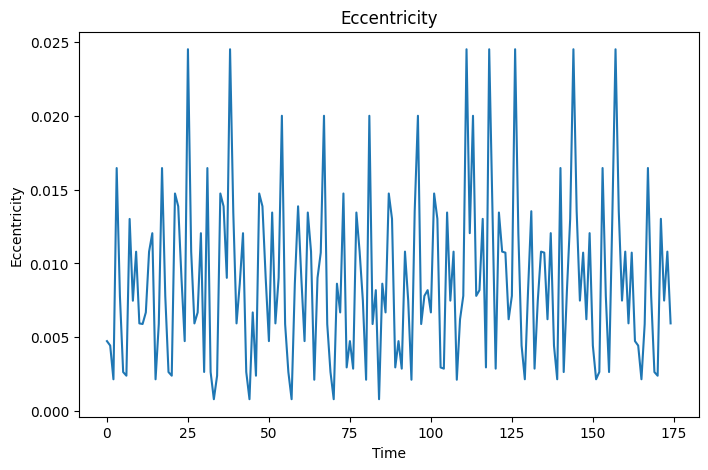

In [16]:
# This data can be plotted and visualized using matplotlib or any other library
# For eg, here is a plot of the data
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x=range(len(data)), y=data["Eccentricity"], ax=ax)

ax.set_title("Eccentricity")
ax.set_xlabel("Time")
ax.set_ylabel("Eccentricity")



### Tutorial of SatLib and Satellite Class in Satellites Module

In [17]:
# Import the functional satellite and GPS Interface
from navigator.core import Satellite, IGPSEphemeris


# Create an object of the functional class
satellite = Satellite(iephemeris=IGPSEphemeris())

In [18]:
# see what satellite contains
satellite
# It prints the __repr__ method of the functional class with informs user about the components of the functional class

Satellite(iephemeris = IGPSEphemeris(GPS))

In [22]:
# This class __call__ method takes the metadata and data of the file as parameters along with the time for which the satellite position is to be calculated
# Let's see a resanobale time to interogate the satellite position
data.index.get_level_values(0).unique().sort_values()

DatetimeIndex(['2022-11-18 23:59:44', '2022-11-19 00:00:00',
               '2022-11-19 01:59:44', '2022-11-19 02:00:00',
               '2022-11-19 03:59:44', '2022-11-19 04:00:00',
               '2022-11-19 05:59:44', '2022-11-19 06:00:00',
               '2022-11-19 07:59:44', '2022-11-19 08:00:00',
               '2022-11-19 09:59:44', '2022-11-19 10:00:00',
               '2022-11-19 12:00:00', '2022-11-19 13:59:44',
               '2022-11-19 14:00:00', '2022-11-19 15:59:44',
               '2022-11-19 16:00:00', '2022-11-19 17:59:44',
               '2022-11-19 18:00:00', '2022-11-19 20:00:00',
               '2022-11-19 22:00:00', '2022-11-19 23:59:44',
               '2022-11-20 00:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)

In [55]:
import pandas as pd

# Let's take the Satellites Ephemeris data at 2022-11-19 00:00:00 TOC (Time of Clock) 
at = pd.Timestamp('2022-11-19 00:00:00')

# Filter the satellites that has 16:00:00 TOC.
nav_data = data.loc(axis=0)[[at], :]

# Final time for which the satellite position is to be calculated
final_time = at + pd.Timedelta(hours=2)

In [56]:
nav_data

SVclockBias  SVclockDrift  SVclockDriftRate   IODE       Crs  \
time       sv                                                                  
2022-11-19 G03    -0.000373 -1.705303e-12               0.0   67.0   8.84375   
           G04    -0.000084  6.707523e-12               0.0   85.0 -60.31250   
           G07     0.000286 -4.774847e-12               0.0   22.0  35.78125   
           G08    -0.000094 -1.818989e-12               0.0   16.0 -34.06250   
           G09    -0.000267  5.684342e-12               0.0   71.0 -60.71875   
           G14    -0.000081  5.229595e-12               0.0  115.0  46.37500   
           G16    -0.000527  1.136868e-13               0.0   50.0  47.37500   
           G26     0.000236  1.136868e-12               0.0   80.0  63.53125   
           G27     0.000175 -8.867573e-12               0.0  118.0 -36.50000   
           G30    -0.000537  3.410605e-13               0.0   34.0  38.81250   

                      DeltaN        M0           Cuc  Eccentricity       Cus  \
time       sv                                                                  
2022-11-19 G03  4.287321e-09 -2.840535  5.960464e-07      0.004439  0.000005   
           G04  4.508402e-09  0.180804 -3.166497e-06      0.002154  0.000008   
           G07  4.544475e-09 -2.338986  1.551583e-06      0.016459  0.000011   
           G08  4.694124e-09  0.547140 -1.728535e-06      0.007800  0.000006   
           G09  4.698767e-09  0.906142 -3.231689e-06      0.002644  0.000008   
           G14  5.072354e-09 -3.099128  2.501532e-06      0.002399  0.000005   
           G16  4.798414e-09  1.414200  2.590939e-06      0.013014  0.000005   
           G26  5.407368e-09  2.311529  3.347173e-06      0.007476  0.000005   
           G27  4.545189e-09  0.537135 -1.750886e-06      0.010796  0.000006   
           G30  4.928062e-09 -2.455302  1.790002e-06      0.005939  0.000011   

                ...  GPSWeek  L2Pflag  SVacc  health           TGD   IODC  \
time       sv   ...                                                         
2022-11-19 G03  ...   2236.0      0.0    2.0     0.0  1.862645e-09   67.0   
           G04  ...   2236.0      0.0    2.0     0.0 -4.656613e-09  341.0   
           G07  ...   2236.0      0.0    2.0     0.0 -1.117587e-08   22.0   
           G08  ...   2236.0      0.0    2.0     0.0  5.122274e-09   16.0   
           G09  ...   2236.0      0.0    2.0     0.0  9.313226e-10   71.0   
           G14  ...   2236.0      0.0    2.0     0.0 -7.916242e-09  883.0   
           G16  ...   2236.0      0.0    2.0     0.0 -1.024455e-08   50.0   
           G26  ...   2236.0      0.0    2.8     0.0  6.984919e-09   80.0   
           G27  ...   2236.0      0.0    2.0     0.0  1.396984e-09  118.0   
           G30  ...   2236.0      0.0    2.0     0.0  3.725290e-09   34.0   

                TransTime  FitIntvl  spare0  spare1  
time       sv                                        
2022-11-19 G03   511218.0       4.0     NaN     NaN  
           G04   511218.0       4.0     NaN     NaN  
           G07   511218.0       4.0     NaN     NaN  
           G08   511218.0       4.0     NaN     NaN  
           G09   511218.0       4.0     NaN     NaN  
           G14   512988.0       4.0     NaN     NaN  
           G16   511218.0       4.0     NaN     NaN  
           G26   511218.0       4.0     NaN     NaN  
           G27   511218.0       4.0     NaN     NaN  
           G30   511218.0       4.0     NaN     NaN  

[10 rows x 31 columns]

In [58]:
# Let's see the position of the satellites at 19:00:00 GPS time
position = satellite(t=final_time, metadata=metadata, data=nav_data)

In [60]:
# Voila! We have the position of the satellites at our final time
position

x             y             z  SVclockBias
time       sv                                                        
2022-11-19 G03  1.828063e+07 -1.217311e+07 -1.498440e+07    -0.000373
           G04  7.342351e+06 -1.489345e+07 -2.070611e+07    -0.000084
           G07  4.173991e+06 -2.462229e+07  8.698021e+06     0.000286
           G08  1.517384e+07 -4.676509e+06  2.129962e+07    -0.000095
           G09 -3.581755e+06 -2.184865e+07 -1.472058e+07    -0.000267
           G14 -1.097088e+07 -1.355574e+07  2.007185e+07    -0.000081
           G16  2.676998e+07  6.563863e+05 -1.708095e+06    -0.000527
           G26  2.310710e+07  5.297490e+06 -1.239951e+07     0.000236
           G27  1.948660e+07  7.482780e+06  1.643600e+07     0.000175
           G30 -5.068324e+06 -1.951042e+07  1.725622e+07    -0.000537

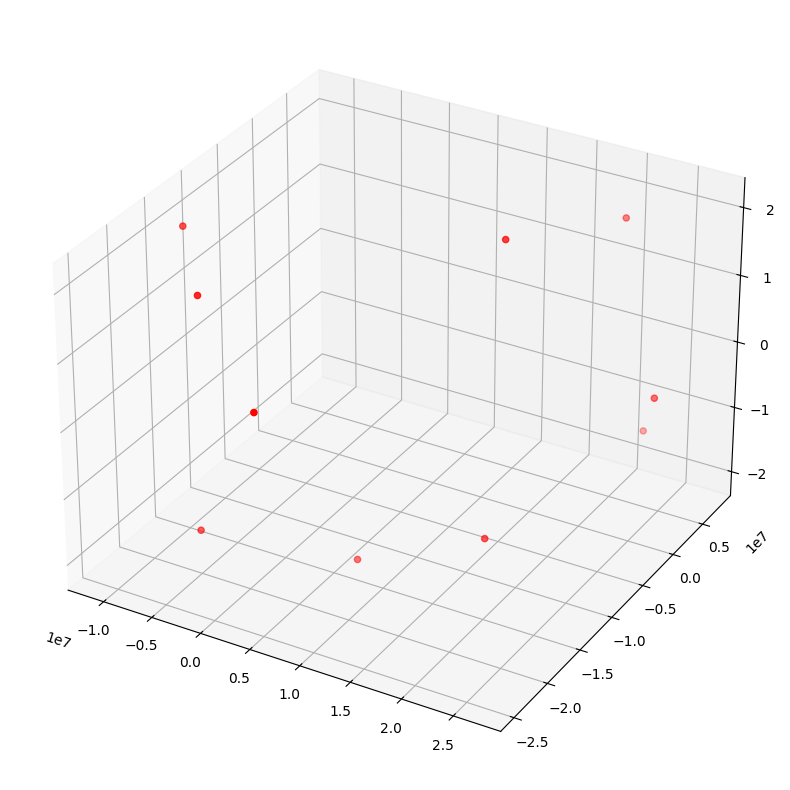

In [62]:
# Let's plot the position of the satellites in 3D
# Use %matplotlib qt to plot in interactive mode in a new window. Requires Qt5 installed
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(position['x'], position['y'], position['z'], c='r', marker='o')

Cool! But I promised trajectory plots. How do I do that?

In [63]:
# Simple Use the trajectory method from the functional class to get the interpolated position of the satellites at any time
# Let's see the trajectory of the satellites from 16:00:00 to 19:00:00 GPS time

trajectory = satellite.trajectory(
    t_sv=at,
    metadata=metadata,
    data=data,
    interval=60 * 60 * 4,  # 2 Hours interval
    step=20,  # Every 20 seconds resolution
)

In [65]:
# Shape of the returned trajectory data is (number of satellites, 3 coordinates, number of points in the trajectory)
# In this case, it is (23, 3, 540) which means 23 satellites, 3 coordinates (x, y, z) and 540 points in the trajectory
trajectory.shape

(175, 3, 720)

Now let's plot the trajectory of the satellite on a 3D plot.

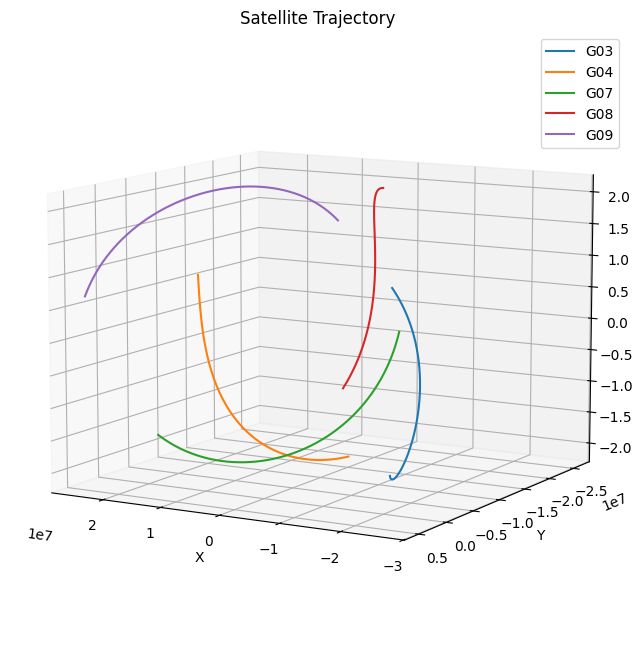

In [89]:
# Let's plot the trajectory of the satellites in 3D
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d' )

for i in range(5):  # For each satellite
    ax.plot(trajectory[i][0], trajectory[i][1], trajectory[i][2], label=nav_data.index.get_level_values(1)[i])

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add title
ax.set_title('Satellite Trajectory')

# Change the view angle
ax.view_init(elev=10, azim=120)

# Add legend
ax.legend()

# Show the plot
plt.show()
fig.savefig("trajectory.png")

In [91]:
at

Timestamp('2022-11-19 00:00:00')

### Development of the Navigator Module
Additional modules and various classes are still in development. 
Interested in contributing? contact me at: [email](mailto:nbhattarai@crimson.ua.edu)
Thanks for following along!